<a href="https://colab.research.google.com/github/nicolerene91/Python_Notebook_Sewell/blob/main/k_in_k_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression without PCA (MNIST):
Accuracy: 0.9211
Training Time: 41.60 seconds

Logistic Regression with PCA (MNIST):
Accuracy (with PCA): 0.9048
Training Time (with PCA): 5.06 seconds


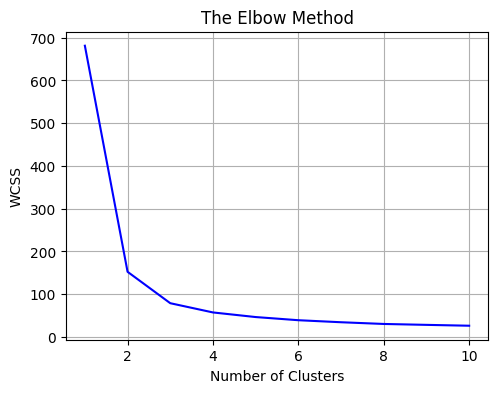

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, load_iris
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

# Split the MNIST dataset into features (X) and labels (y)
X_mnist, y_mnist = mnist
X_mnist = X_mnist / 255.0

# Split the MNIST dataset into training and testing sets
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=11)

# Train logistic regression without PCA on MNIST
start_time = time.time()
lr_mnist = LogisticRegression(max_iter=100)
lr_mnist.fit(X_train_mnist, y_train_mnist)
end_time = time.time()
elapsed_time_no_pca = end_time - start_time

# Make predictions and calculate accuracy without PCA on MNIST
y_pred_no_pca_mnist = lr_mnist.predict(X_test_mnist)
accuracy_no_pca_mnist = accuracy_score(y_test_mnist, y_pred_no_pca_mnist)

# Apply PCA dimensional reduction to MNIST
n_components_mnist = 50
pca_mnist = PCA(n_components=n_components_mnist)
X_train_pca_mnist = pca_mnist.fit_transform(X_train_mnist)
X_test_pca_mnist = pca_mnist.transform(X_test_mnist)

# Train logistic regression with PCA on MNIST
start_time = time.time()
lr_pca_mnist = LogisticRegression(max_iter=100)
lr_pca_mnist.fit(X_train_pca_mnist, y_train_mnist)
end_time = time.time()
elapsed_time_with_pca = end_time - start_time

# Make predictions and calculate accuracy with PCA on MNIST
X_test_pca_mnist = pca_mnist.transform(X_test_mnist)
y_pred_pca_mnist = lr_pca_mnist.predict(X_test_pca_mnist)
accuracy_with_pca_mnist = accuracy_score(y_test_mnist, y_pred_pca_mnist)

# Compare results for MNIST
print("Logistic Regression without PCA (MNIST):")
print(f"Accuracy: {accuracy_no_pca_mnist:.4f}")
print(f"Training Time: {elapsed_time_no_pca:.2f} seconds")

print("\nLogistic Regression with PCA (MNIST):")
print(f"Accuracy (with PCA): {accuracy_with_pca_mnist:.4f}")
print(f"Training Time (with PCA): {elapsed_time_with_pca:.2f} seconds")

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data

# Initialize an empty list to store WCSS values for different k
wcss = []

# Try a range of k values (from 1 to 10, for example)
k_values = range(1, 11)

# Calculate WCSS for each k for Iris dataset
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=11)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow point for Iris dataset
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, linestyle='-', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()